MUSIC RECOMMENDER SYSTEM

Importing the required Libraries

In [71]:
import pandas as pd  # For data analysis and associated manipulation of tabular data in Dataframes
import numpy as np  #for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
from sklearn.metrics.pairwise import cosine_similarity  #Cosine Similarity is a metric that allows you to measure the similarity of the documents.
from sklearn.metrics.pairwise import sigmoid_kernel  #computes the sigmoid kernel between two vectors.The sigmoid kernel is also known as hyperbolic tangent.
from sklearn import preprocessing  #provides several common utility functions and transformer classes
import webbrowser  #provides a high-level interface to allow displaying Web-based documents to users

#For Visualizations
import matplotlib.pyplot as plt  #for interactive plots and simple cases of programmatic plot generation
import seaborn as sns  # provides a high-level interface for drawing attractive and informative statistical graphics
import plotly.express as px  #contains functions that can create entire figures at once
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Understanding the Dataset
~~~~~~~~~~~~~~~~~~~~~~~~
Let’s understand the dataset. In this dataset, we have 18 columns: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, target, song_title, artist, year, popularity.
1. Acousticness confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
2. Danceability measure describes how suitable a track is for dancing. 
3. duration_ms is the duration of the song track in milliseconds. 
4. Energy represents a perceptual measure of intensity and activity. 
5. Instrumentalness predicts whether a track contains vocals or not. 
6. Loudness of a track in decibels(dB). 
7. Liveness detects the presence of an audience in the recording. 
8. Speechiness detects the presence of spoken words in a track 
9. Time_signature is an estimated overall time signature of a track. 
10. Key the track is in. Integers map to pitches using standard Pitch Class notation. 
11. Valence measures from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
12. Year represents year of release. 
13. Popularity shows measure of user engagement or popularity itself. 
14. Target value describes the encoded value of 0 and 1. 0 means listener has not saved the song and 1 means listener have saved the song. 
15. Tempo is in beats per minute (BPM). 
16. Mode indicates the modality(major or minor) of the song. 
17. Song_title is the name of the song. 
18. Artist is the singer of the song.

In [72]:
#Loading the Date Set
df=pd.read_csv("dataset.csv")
#Print the first 10 rows
df.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,popularity,year
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,4,2021
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,5,2021
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,5,2021
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,3,2021
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,2,2021
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake,6,2021
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4,0.308,1,Childs Play,Drake,4,2021
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4,0.393,1,Gyöngyhajú lány,Omega,2,2021
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4,0.398,1,I've Seen Footage,Death Grips,0,2021
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4,0.386,1,Digital Animal,Honey Claws,0,2021


Basic Information about the Data

In [73]:
#Get the shape of the data (the number of rows & cols)
df.shape

(2017, 19)

In [74]:
#Checking NULL Values in columns
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
popularity          0
year                0
dtype: int64

In [75]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,popularity,year
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.535944,0.187590,0.618422,2.463564e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702,3.861676,2016.666832
std,583.288262,0.259989,0.161029,8.195271e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091,6.848213,3.152074
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000,0.000000,2012.000000
25%,504.000000,0.009630,0.514000,2.006250e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000,0.000000,2014.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000,0.000000,2016.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000,6.000000,2019.000000
max,2022.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000,55.000000,2022.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


EDA : Exploratory Data Analysis

<AxesSubplot:xlabel='mode', ylabel='Density'>

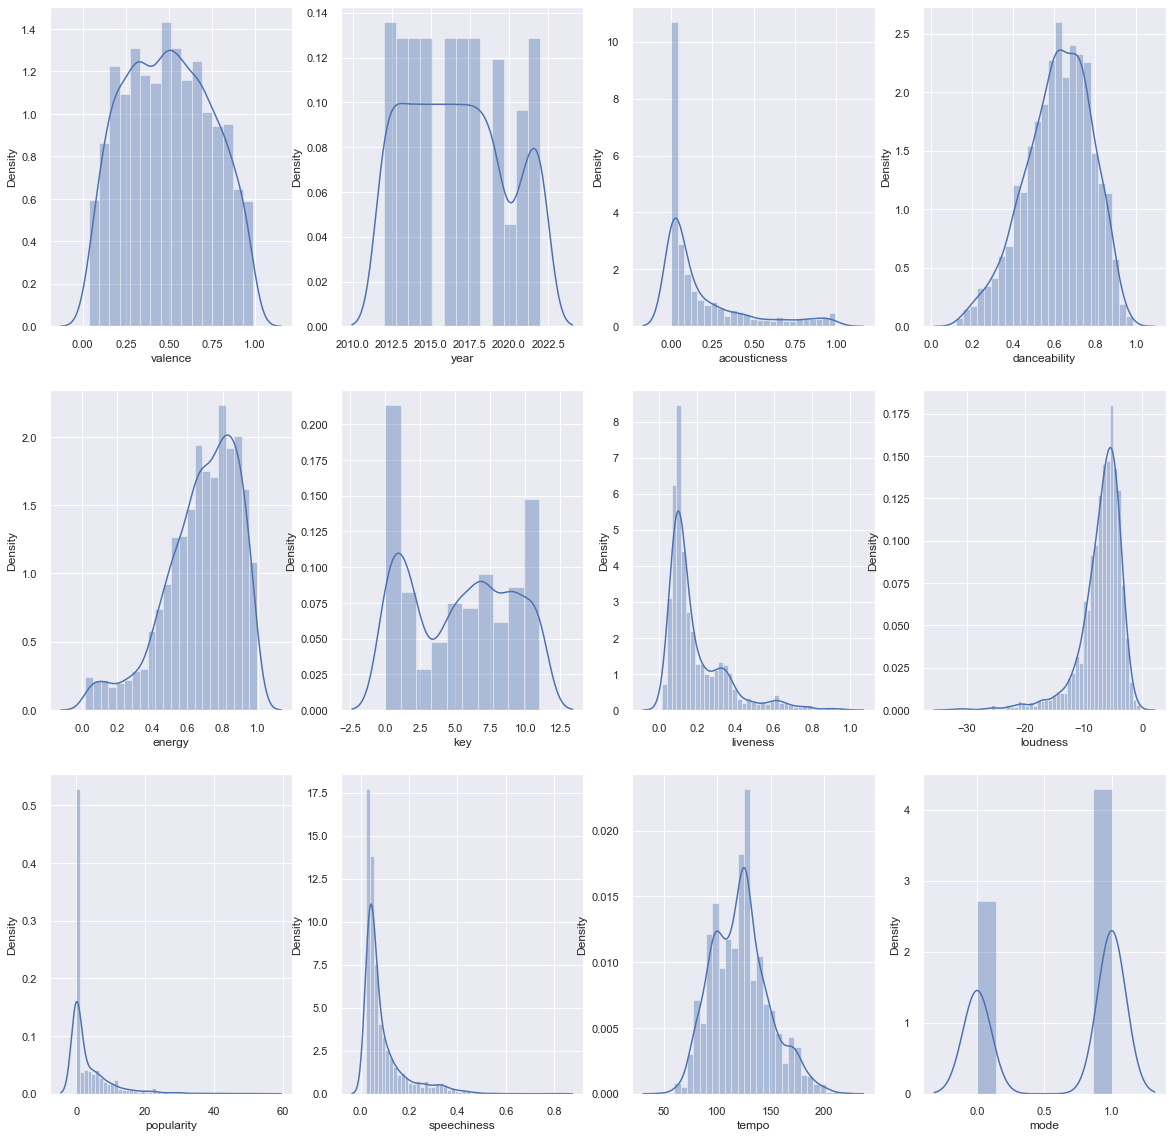

In [77]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))
sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

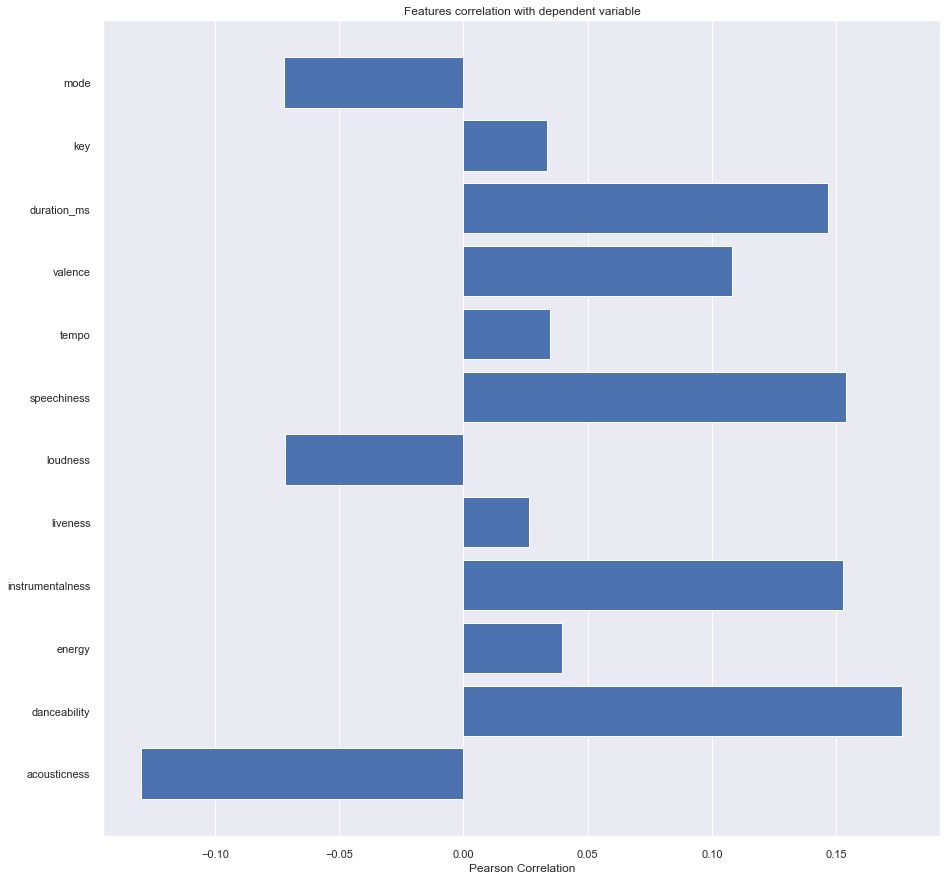

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [78]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']

X, y = df[feature_names], df['target']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(15,15)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [79]:
#get the correlation of the columns
df.corr()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,popularity,year
Unnamed: 0,1.000000,0.132689,-0.138980,-0.104068,-0.039583,-0.104929,-0.035539,-0.039185,0.022076,0.060826,-0.134946,-0.027816,-0.053040,-0.077379,-0.865583,0.057478,-0.719001
acousticness,0.132689,1.000000,-0.179894,0.071488,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627,-0.076865,-0.134341
danceability,-0.138980,-0.179894,1.000000,0.004914,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706,-0.023487,0.178295
duration_ms,-0.104068,0.071488,0.004914,1.000000,-0.144542,0.305464,0.023777,0.022905,-0.273782,-0.074910,-0.079601,-0.076300,-0.040072,-0.120031,0.146608,-0.006119,-0.019719
energy,-0.039583,-0.646319,0.038557,-0.144542,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688,0.066246,0.090953
instrumentalness,-0.104929,0.144397,-0.130561,0.305464,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594,-0.020104,-0.057315
key,-0.035539,-0.081037,0.022325,0.023777,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594,-0.023476,0.003288
liveness,-0.039185,-0.117126,-0.132044,0.022905,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364,0.002924,0.003276
loudness,0.022076,-0.562021,0.104362,-0.273782,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000,0.063125,0.084143
mode,0.060826,0.068028,-0.047867,-0.074910,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336,-0.043275,0.006930


<AxesSubplot:>

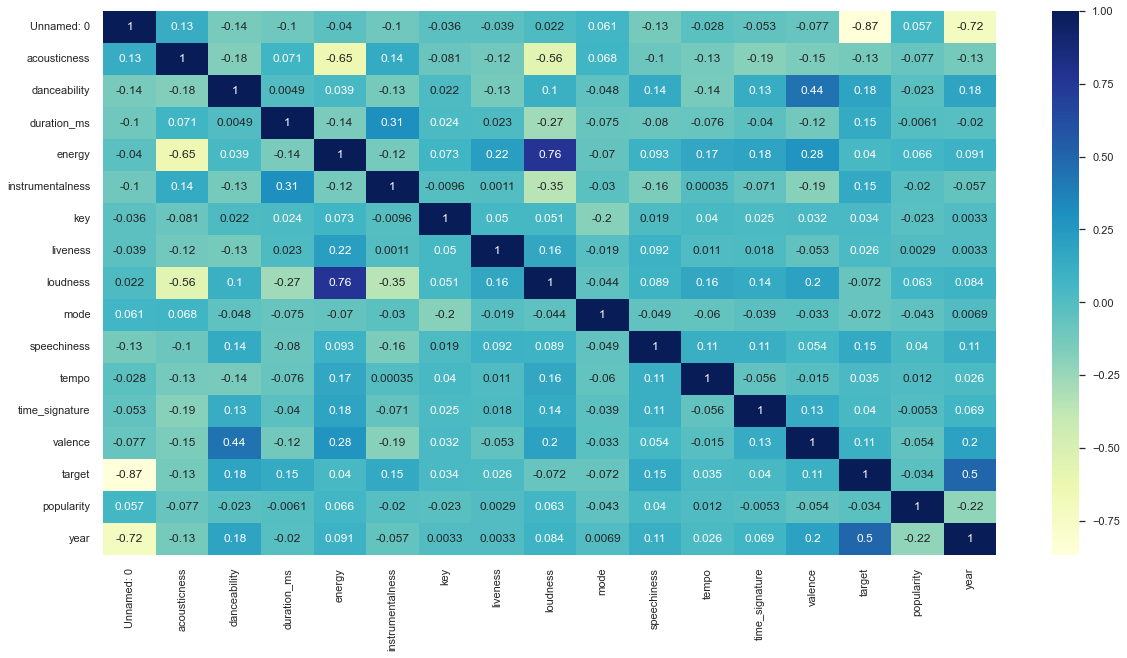

In [80]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu',annot_kws={"fontsize":12})

Top Songs

Text(0.5, 0, 'Popularity')

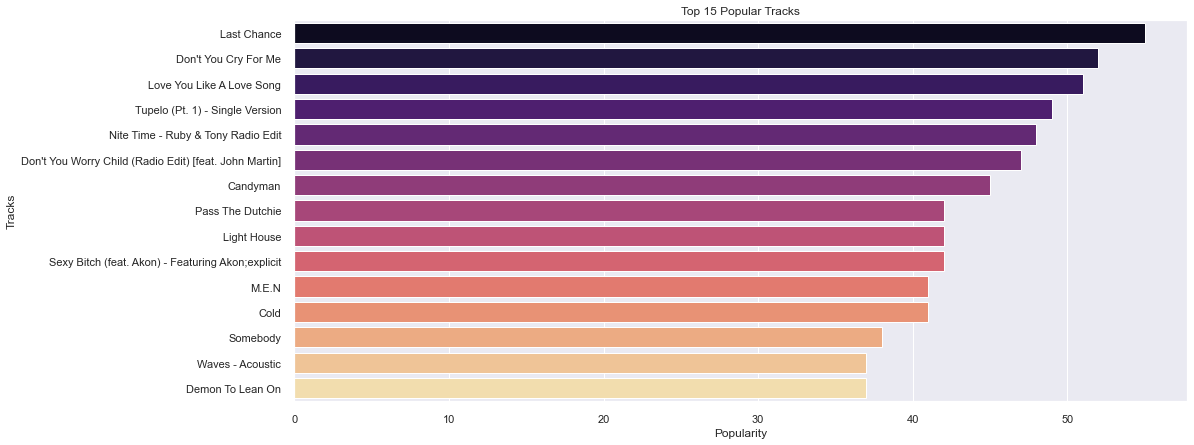

In [81]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("song_title")['popularity'].sum().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="magma",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Tracks')
axis.set_xlabel('Popularity')

In [97]:
#Take me to a Top Song
song=popular.index[1]
webbrowser.open('https://open.spotify.com/search/%s' %song)

True

Top Artists

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

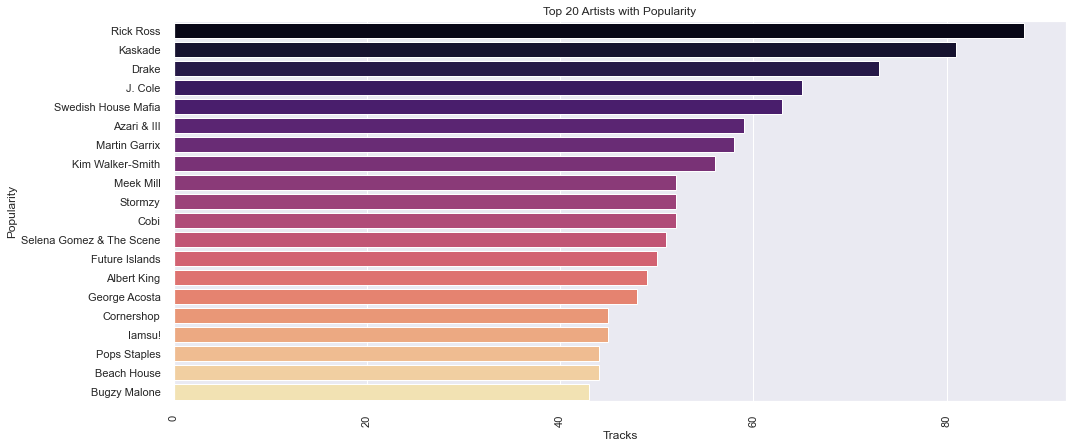

In [83]:
fig, axis = plt.subplots(figsize = (16,7))
popularx = df.groupby("artist")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popularx,popularx.index,palette="magma",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [98]:
#Take me to a Top Artist
artistx=popularx.index[2]
webbrowser.open('https://open.spotify.com/search/%s/artists' %artistx)

True

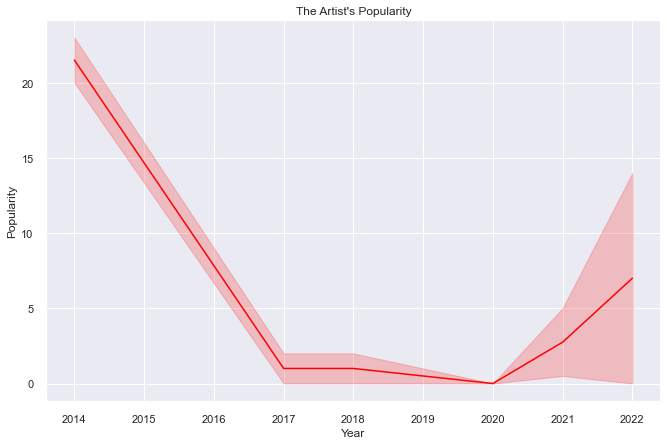

In [85]:
# visualize the popularity of Drake's songs over the year
Drake = df[df['artist'] == 'Drake']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Drake, color='Red')
# Labels
plt.title("The Artist's Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

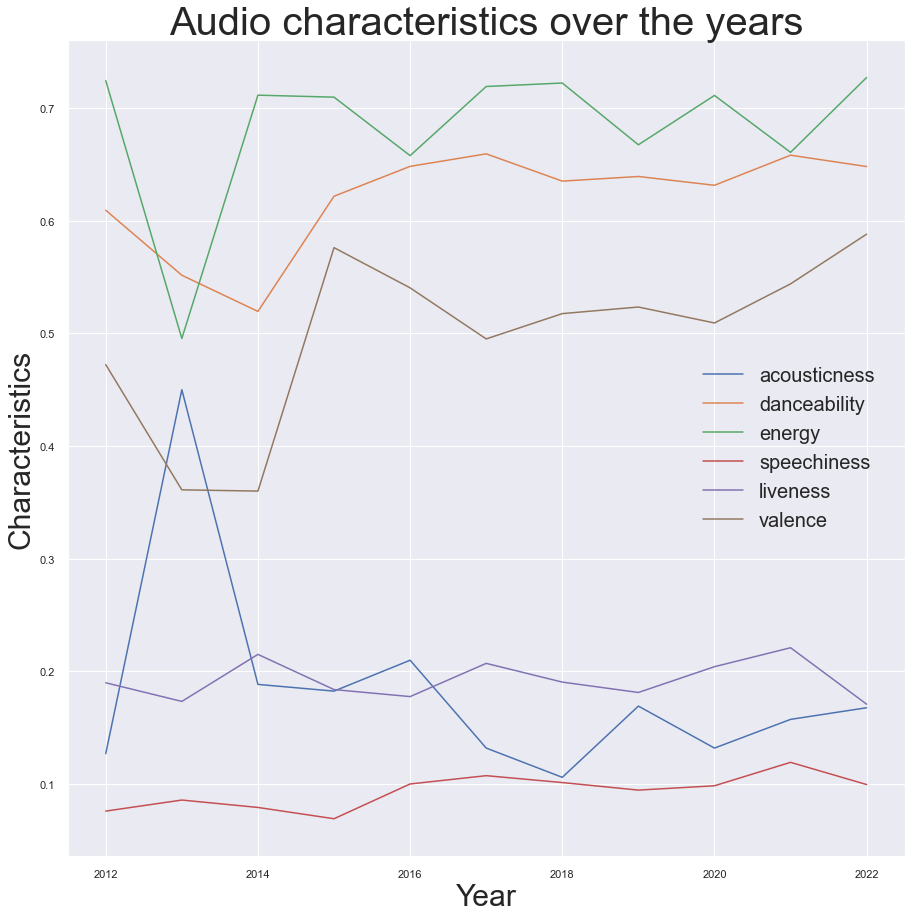

In [86]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(15,15))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 20}, loc = 'center right')
plt.show()

<AxesSubplot:xlabel='year', ylabel='count'>

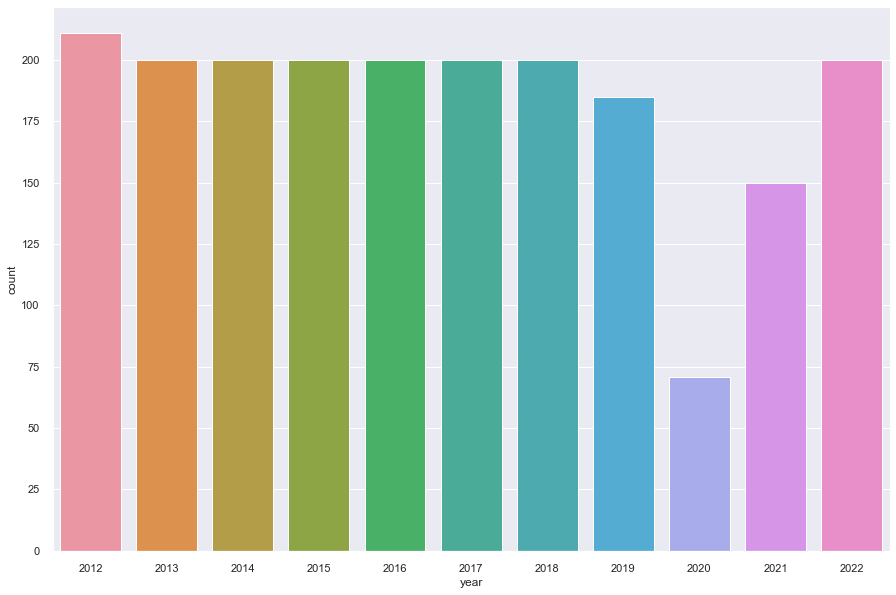

In [87]:
sns.set(rc={'figure.figsize':(15 ,10)})
sns.countplot(df['year'])

In [88]:
y=pd.DataFrame(df['artist'].value_counts().head(10)).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Drake,16
1,Rick Ross,13
2,Disclosure,12
3,WALK THE MOON,10
4,Backstreet Boys,10
5,Crystal Castles,9
6,FIDLAR,9
7,Future,8
8,Fall Out Boy,8
9,Skrillex,8


In [89]:
Drake = df[df['artist'] == 'Drake']
Drake['song_title']

5                        Sneakin’
6                     Childs Play
37                        Jumpman
117                 Hotline Bling
154                     Big Rings
158                 Know Yourself
168               Wu-Tang Forever
440                     Headlines
589       Started From the Bottom
676     Hold On, We're Going Home
717     Hold On, We're Going Home
779       0 To 100 / The Catch Up
1016             Skepta Interlude
1183                 Passionfruit
1218              Best I Ever Had
1223                    Take Care
Name: song_title, dtype: object

In [90]:
Drakex=Drake['song_title'].values[0]
webbrowser.open('https://open.spotify.com/search/%s' %Drakex)

True

Recommender System

In [93]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,popularity,year
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,4,2021
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,5,2021
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,5,2021
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,3,2021
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,2,2021


In [63]:
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence','popularity']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(df[feature_cols])


In [92]:
for x in normalized_df[:2]:
  print(x)

[0.01024843 0.82482599 0.19073524 0.4263629  0.02243852 0.18181818
 0.15386234 0.74114059 1.         0.51444066 0.59603317 0.75
 0.26243209 0.07272727]
[0.19999772 0.72041763 0.3144808  0.35008137 0.00626025 0.09090909
 0.12439486 0.69216224 1.         0.07100517 0.6544742  0.75
 0.57793565 0.09090909]


In [64]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(df.index, index=df['song_title']).drop_duplicates()
# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)

def generate_recommendation(song_title, model_type):
    # Get song indices
    index=indices[song_title]
    # Get list of songs for given songs
    score=list(enumerate(model_type[index]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-10 recommend songs
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 10 recommende songs
    top_songs=df['song_title'].iloc[top_songs_index]
    return top_songs

In [100]:
recommendations=generate_recommendation('Walk With Me',cosine).values
print("Recommended Songs:\n~~~~~~~~~~~~~~~~~~~")
for x in recommendations:
  print(x)

Recommended Songs:
~~~~~~~~~~~~~~~~~~~
Master Of None
Uncast Shadow Of A Southern Myth
Fuego
Tides of Neptune
5ft7
What I Might Do - Club Mix
Here Comes The Night Time II
What I Might Do - Club Mix
Count Your Blessings
What I Might Do


In [101]:
next_song=recommendations[0]
webbrowser.open('https://www.youtube.com/results?search_query=%s' %next_song)
webbrowser.open('https://open.spotify.com/search/%s' %next_song)

True

In [96]:
print("Recommended Songs:\n~~~~~~~~~~~~~~~~~~~")
recommendations=generate_recommendation("It's My Party",cosine).values
next_song=recommendations[0]
webbrowser.open('https://www.youtube.com/results?search_query=%s' %next_song)
webbrowser.open('https://open.spotify.com/search/%s' %next_song)
for x in recommendations:
  print(x)

Recommended Songs:
~~~~~~~~~~~~~~~~~~~
To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)
Happy People
Can You Get To That
Last Kiss
Be Brave
Deja vu
No Such Thing as a Broken Heart
Dangerous
Smoke
San Francisco


In [32]:
print("Recommended Songs:\n~~~~~~~~~~~~~~~~~~~")
recommendations=generate_recommendation('Last Chance',cosine).values
next_song=recommendations[0]
webbrowser.open('https://www.youtube.com/results?search_query=%s' %next_song)
webbrowser.open('https://open.spotify.com/search/%s' %next_song)
for x in recommendations:
  print(x)

Recommended Songs:
~~~~~~~~~~~~~~~~~~~
All Aloud
Scared To Be Lonely (Conro Remix)
Blackout - Madison Mars Radio Mix
Can't Take It
Counting Stars
Light House
Brightside - Borgeous Remix
Don't You Worry Child (Radio Edit) [feat. John Martin]
Never Be Your Woman (Shy FX Radio Edit) [feat. Emeli Sandé]
Waiting


In [159]:
  # Create sigmoid kernel matrix based on given matrix
sig_kernel = sigmoid_kernel(normalized_df)
print("Recommended Songs:\n~~~~~~~~~~~~~~~~~~~")
recommendations=generate_recommendation('Parallel Lines',sig_kernel).values
next_song=recommendations[0]
webbrowser.open('https://www.youtube.com/results?search_query=%s' %next_song)
webbrowser.open('https://open.spotify.com/search/%s' %next_song)
for x in recommendations:
  print(x)

Recommended Songs:
~~~~~~~~~~~~~~~~~~~
To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)
Happy People
Can You Get To That
Last Kiss
Be Brave
Deja vu
No Such Thing as a Broken Heart
Dangerous
Smoke
San Francisco


In [160]:
#Transform the non-numeric data in the columns
from sklearn.preprocessing import LabelEncoder
cols = ['song_title','artist']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head(n=5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,popularity,year
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,1043,449,4,2021
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,1334,222,5,2021
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,1906,449,5,2021
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,1044,95,3,2021
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,1243,628,2,2021


In [161]:
data = df.drop(['song_title', 'duration_ms', 'Unnamed: 0','year','popularity'], axis=1)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [163]:
X = data.drop(['target'], axis=1)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [164]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
print(accuracy_score(y_test,y_lr))
print(classification_report(y_test, y_lr))

0.6316831683168317
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       245
           1       0.64      0.66      0.65       260

    accuracy                           0.63       505
   macro avg       0.63      0.63      0.63       505
weighted avg       0.63      0.63      0.63       505



In [165]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
d_acc=accuracy_score(y_test,d_tree.predict(X_test))
print("Test Set Accuracy:"+str(accuracy_score(y_test,d_tree.predict(X_test))*100))
print(classification_report(y_test,d_tree.predict(X_test)))

Test Set Accuracy:69.5049504950495
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       245
           1       0.69      0.73      0.71       260

    accuracy                           0.70       505
   macro avg       0.70      0.69      0.69       505
weighted avg       0.70      0.70      0.69       505



In [166]:
k_nei = KNeighborsClassifier()
k_nei.fit(X_train,y_train)
k_acc = accuracy_score(y_test,k_nei.predict(X_test))
print(accuracy_score(y_test,k_nei.predict(X_test)))
print(classification_report(y_test, k_nei.predict(X_test)))

0.5564356435643565
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       245
           1       0.56      0.62      0.59       260

    accuracy                           0.56       505
   macro avg       0.56      0.55      0.55       505
weighted avg       0.56      0.56      0.55       505



In [167]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_rf))
print(classification_report(y_test, y_rf))

0.7801980198019802
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       245
           1       0.79      0.78      0.78       260

    accuracy                           0.78       505
   macro avg       0.78      0.78      0.78       505
weighted avg       0.78      0.78      0.78       505



In [168]:
models = pd.DataFrame({
    'Model': ['Logistic','Random Forest', 'KNN','Decision Tree'],
    'Score': [ accuracy_score(y_test,y_lr), accuracy_score(y_test, y_rf), accuracy_score(y_test,k_nei.predict(X_test)), accuracy_score(y_test,d_tree.predict(X_test))]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest,0.780198
3,Decision Tree,0.695050
0,Logistic,0.631683
2,KNN,0.556436


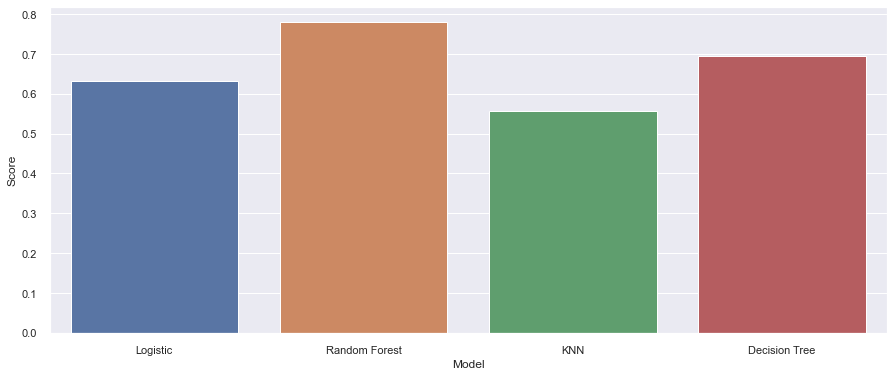

In [169]:
plt.figure(figsize=(15,6))
sns.barplot(x='Model',y='Score',data=models)
plt.show()